In [10]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [11]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [12]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [13]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [14]:
special_data = pd.DataFrame(data)

In [15]:
special_data = data[(data['Date'] > '2014-06-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [16]:
#change indexes
special_data.set_index('Date', inplace = True)

In [17]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [18]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2014-06-02,1924.97,1923.87,1925.88,1915.98,0.07%,06/02/2014
2014-06-03,1924.24,1923.07,1925.07,1918.79,-0.04%,06/03/2014
2014-06-04,1927.88,1923.06,1928.63,1918.60,0.19%,06/04/2014
2014-06-05,1940.46,1928.52,1941.74,1922.93,0.65%,06/05/2014
2014-06-06,1949.44,1942.41,1949.44,1942.41,0.46%,06/06/2014
2014-06-09,1951.27,1948.97,1955.55,1947.16,0.09%,06/09/2014
2014-06-10,1950.79,1950.34,1950.86,1944.64,-0.02%,06/10/2014
2014-06-11,1943.89,1949.37,1949.37,1940.08,-0.35%,06/11/2014
2014-06-12,1930.11,1943.35,1943.35,1925.78,-0.71%,06/12/2014


In [19]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2014-06-02,1924.97,1923.87,1925.88,1915.98,0.07%,06/02/2014,1924.97,1924.97
2014-06-03,1924.24,1923.07,1925.07,1918.79,-0.04%,06/03/2014,1924.24,1924.24
2014-06-04,1927.88,1923.06,1928.63,1918.60,0.19%,06/04/2014,1927.88,1927.88
2014-06-05,1940.46,1928.52,1941.74,1922.93,0.65%,06/05/2014,1940.46,1940.46
2014-06-06,1949.44,1942.41,1949.44,1942.41,0.46%,06/06/2014,1949.44,1949.44


In [20]:
import datetime

special_data.new_index[0] = 1401624000
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [21]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [22]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-06-01 19:00:00,1924.97,1923.87,1925.88,1915.98,0.07%,06/02/2014,1.401624e+09
2014-06-02 19:00:00,1924.24,1923.07,1925.07,1918.79,-0.04%,06/03/2014,1.401710e+09
2014-06-03 19:00:00,1927.88,1923.06,1928.63,1918.60,0.19%,06/04/2014,1.401797e+09
2014-06-04 19:00:00,1940.46,1928.52,1941.74,1922.93,0.65%,06/05/2014,1.401883e+09
2014-06-05 19:00:00,1949.44,1942.41,1949.44,1942.41,0.46%,06/06/2014,1.401970e+09
2014-06-06 19:00:00,1951.27,1948.97,1955.55,1947.16,0.09%,06/09/2014,1.402056e+09
2014-06-07 19:00:00,1950.79,1950.34,1950.86,1944.64,-0.02%,06/10/2014,1.402142e+09
2014-06-08 19:00:00,1943.89,1949.37,1949.37,1940.08,-0.35%,06/11/2014,1.402229e+09
2014-06-09 19:00:00,1930.11,1943.35,1943.35,1925.78,-0.71%,06/12/2014,1.402315e+09


In [23]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [24]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

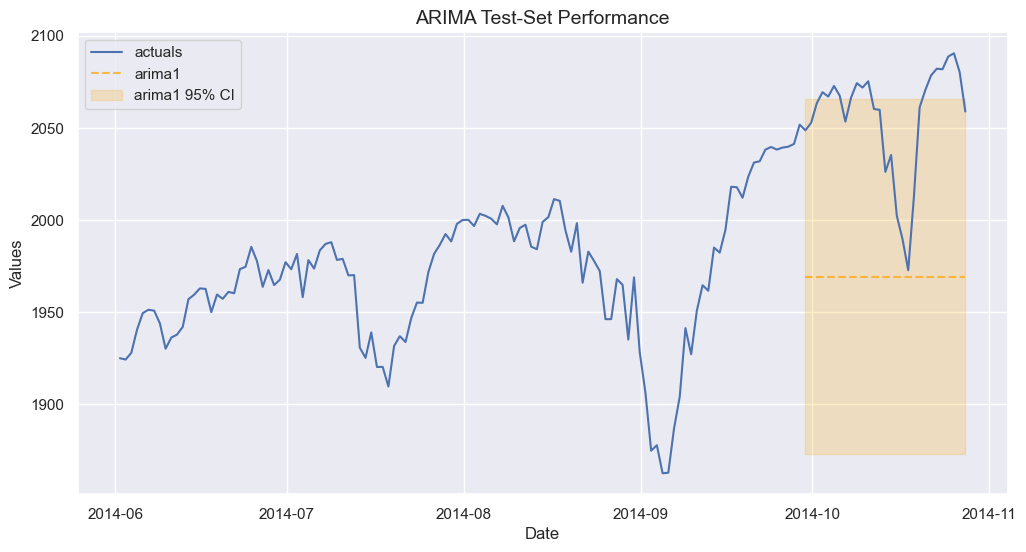

In [25]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

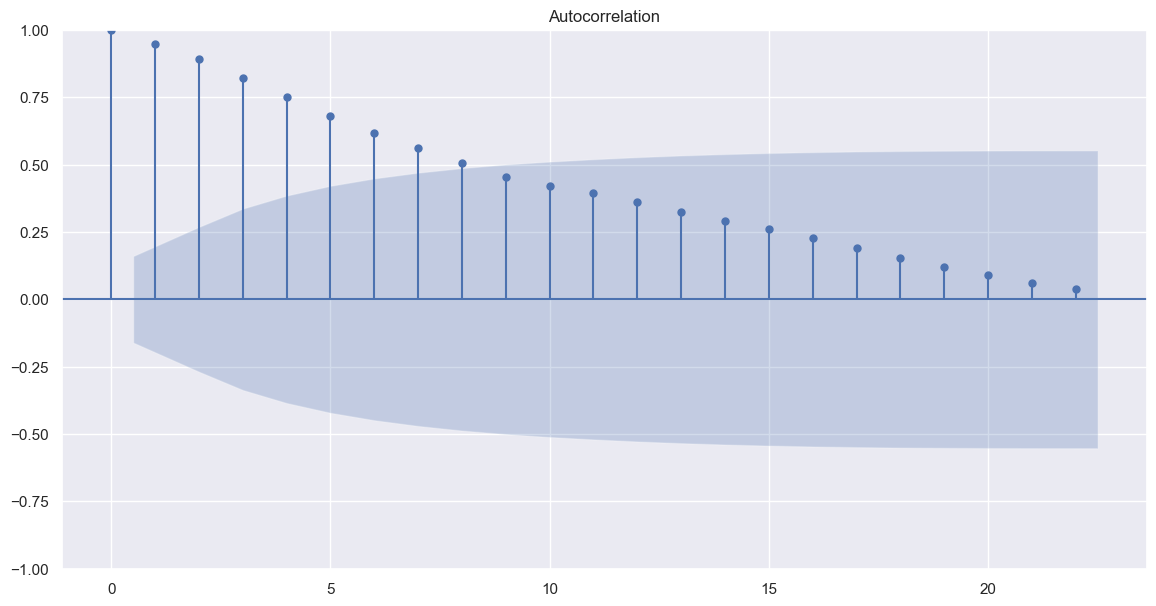

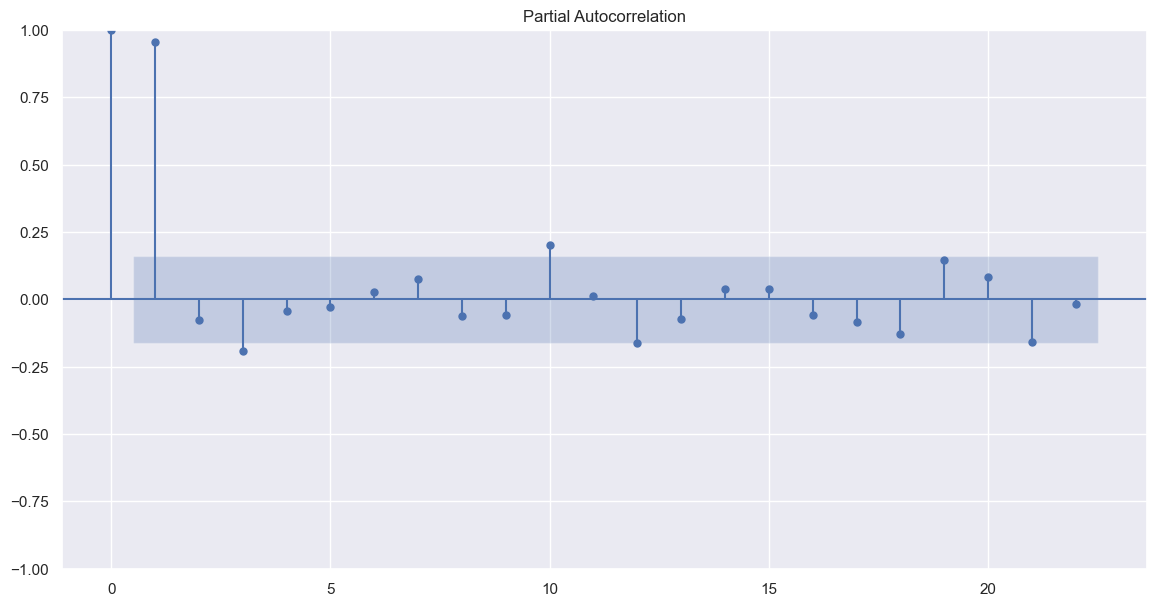

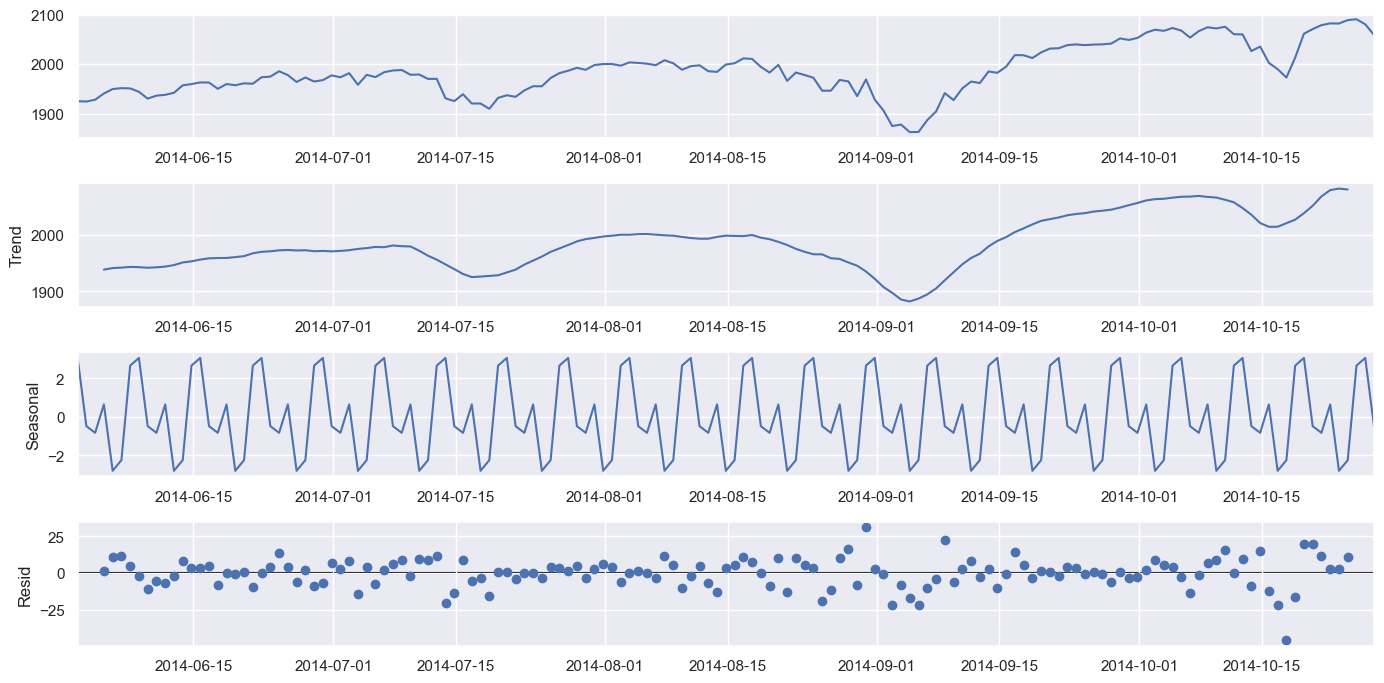

-2.0267699568390096
0.2749601366062089


In [26]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

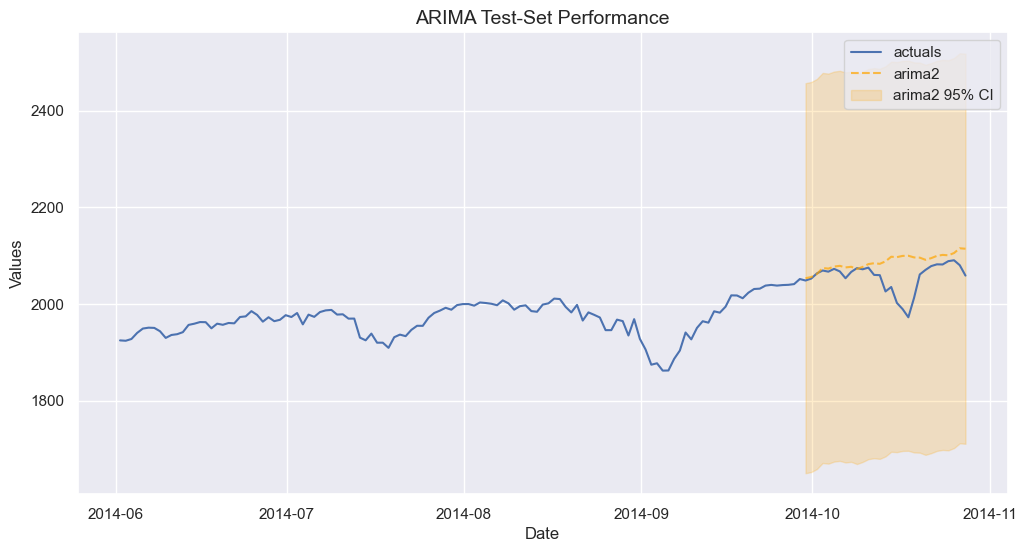

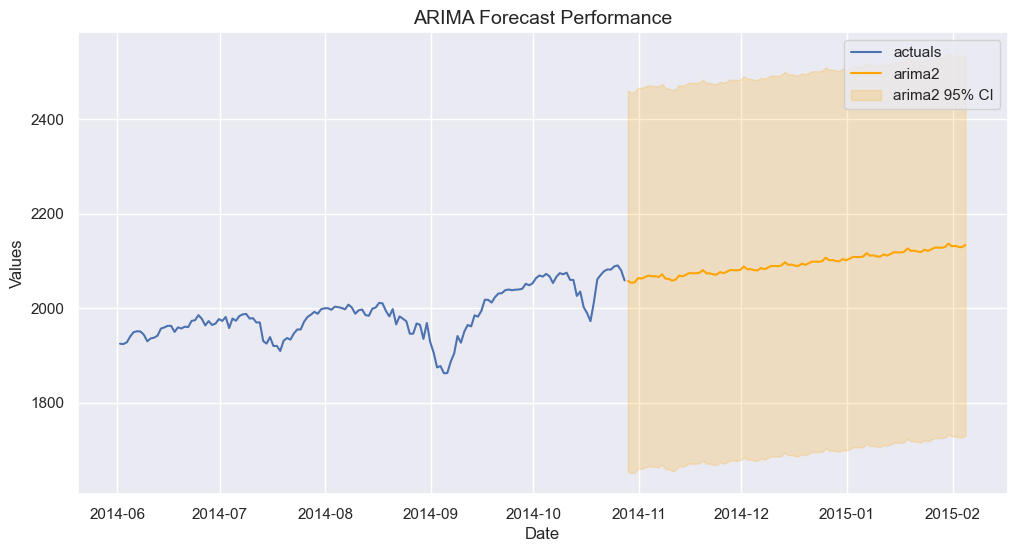

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  149
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -568.399
Date:                          Sun, 22 Oct 2023   AIC                           1150.799
Time:                                  11:19:57   BIC                           1171.187
Sample:                                       0   HQIC                          1159.084
                                          - 149                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9894      0.125      7.903      0.000       0.744       1.235
ar.L2         -0.0381      0.071     -0.540      0.589      -0.176       0.100
ma.L1         -0.9996      5.644     -0.177      0.859     -12.062      10.063
ar.S.L12       0.0849      0.167      0.508      0.611      -0.243       0.412
ar.S.L24       0.0764      0.184      0.414      0.679      -0.285       0.438
ma.S.L12      -0.9993     29.638     -0.034      0.973     -59.090      57.091
sigma2       200.7799   6012.904      0.033      0.973   -1.16e+04     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.02
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               1.56   Skew:                            -0.03
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [28]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [29]:
adf_test(special_data['Close'])

1. ADF :  -2.0267699568390096
2. P-Value :  0.2749601366062089
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 146
5. Critical Values :
	 1% :  -3.4759527332353084
	 5% :  -2.881548071241103
	 10% :  -2.577438765246763


In [30]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  149
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -601.803
Date:                Sun, 22 Oct 2023   AIC                           1205.606
Time:                        11:19:57   BIC                           1208.603
Sample:                    06-01-2014   HQIC                          1206.824
                         - 10-27-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       199.2686     17.553     11.353      0.000     164.866     233.671
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                15.13
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                            -0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
data_len = len(special_data)

In [32]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [33]:
train_data = special_data.iloc[:int(train_len)]

In [34]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [35]:
test_data.Close

new_date
2014-09-13 19:00:00    1985.05
2014-09-14 19:00:00    1982.30
2014-09-15 19:00:00    1994.65
2014-09-16 19:00:00    2018.05
2014-09-17 19:00:00    2017.81
2014-09-18 19:00:00    2012.10
2014-09-19 19:00:00    2023.57
2014-09-20 19:00:00    2031.21
2014-09-21 19:00:00    2031.92
2014-09-22 19:00:00    2038.26
2014-09-23 19:00:00    2039.68
2014-09-24 19:00:00    2038.25
2014-09-25 19:00:00    2039.33
2014-09-26 19:00:00    2039.82
2014-09-27 19:00:00    2041.32
2014-09-28 19:00:00    2051.80
2014-09-29 19:00:00    2048.72
2014-09-30 19:00:00    2052.75
2014-10-01 19:00:00    2063.50
2014-10-02 19:00:00    2069.41
2014-10-03 19:00:00    2067.03
2014-10-04 19:00:00    2072.83
2014-10-05 19:00:00    2067.56
2014-10-06 19:00:00    2053.44
2014-10-07 19:00:00    2066.55
2014-10-08 19:00:00    2074.33
2014-10-09 19:00:00    2071.92
2014-10-10 19:00:00    2075.37
2014-10-11 19:00:00    2060.31
2014-10-12 19:00:00    2059.82
2014-10-13 19:00:00    2026.14
2014-10-14 19:00:00    2035.33

In [36]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-06-01 19:00:00,1924.97,1923.87,1925.88,1915.98,0.07%,06/02/2014,1.401624e+09
2014-06-02 19:00:00,1924.24,1923.07,1925.07,1918.79,-0.04%,06/03/2014,1.401710e+09
2014-06-03 19:00:00,1927.88,1923.06,1928.63,1918.60,0.19%,06/04/2014,1.401797e+09
2014-06-04 19:00:00,1940.46,1928.52,1941.74,1922.93,0.65%,06/05/2014,1.401883e+09
2014-06-05 19:00:00,1949.44,1942.41,1949.44,1942.41,0.46%,06/06/2014,1.401970e+09
...,...,...,...,...,...,...,...
2014-09-08 19:00:00,1941.28,1909.38,1942.45,1909.38,1.96%,10/21/2014,1.410178e+09
2014-09-09 19:00:00,1927.11,1941.29,1949.31,1926.83,-0.73%,10/22/2014,1.410264e+09
2014-09-10 19:00:00,1950.82,1931.02,1961.95,1931.02,1.23%,10/23/2014,1.410350e+09


In [37]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1022.105, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=943.978, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=897.552, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=885.280, Time=0.14 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=858.085, Time=0.16 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=847.645, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=842.729, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=844.314, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=842.593, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=838.149, Time=0.09 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=837.881, Time=0.11 sec
 ARIMA(1,0,5)(0,0,0)[1] intercept   : AIC=839.311, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=844.146, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=845.260, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=841.288, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[1] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(4, 0, 4)   Log Likelihood                -408.200
Date:                Sun, 22 Oct 2023   AIC                            836.401
Time:                        11:20:03   BIC                            862.844
Sample:                    06-01-2014   HQIC                           847.114
                         - 09-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    316.1020    163.412      1.934      0.053      -4.181     636.385
ar.L1          1.3388      0.299      4.475      0.000       0.752       1.925
ar.L2         -1.3438      0.304     -4.422      0.000      -1.939      -0.748
ar.L3          1.3580      0.308      4.402      0.000       0.753       1.963
ar.L4         -0.5141      0.253     -2.034      0.042      -1.010      -0.019
ma.L1         -0.5404      0.293     -1.844      0.065      -1.115       0.034
ma.L2          1.2835      0.176      7.305      0.000       0.939       1.628
ma.L3         -0.5231      0.304     -1.719      0.086      -1.120       0.073
ma.L4          0.3523      0.126      2.798      0.005       0.106       0.599
sigma2       157.2039     24.491      6.419      0.000     109.203     205.205
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.95
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.14   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

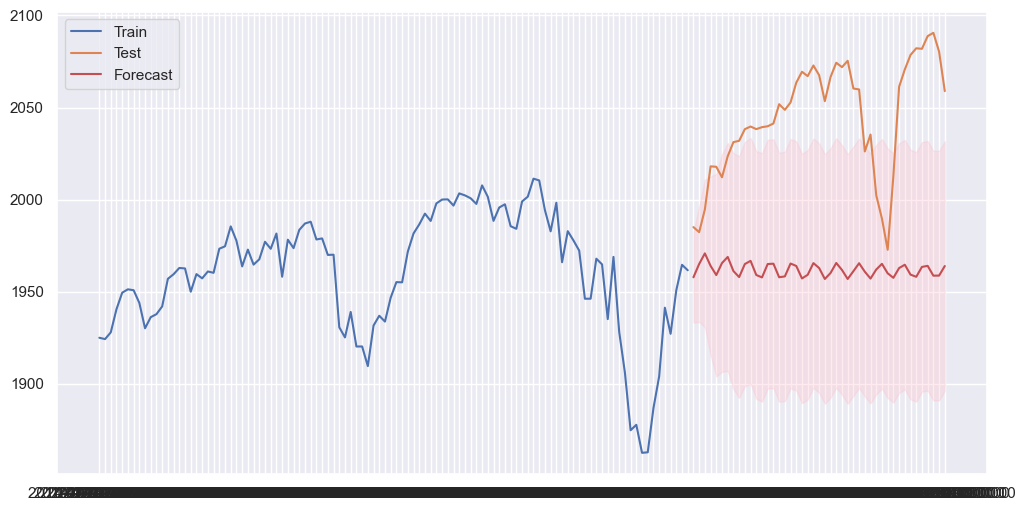

In [38]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [39]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  104
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -410.529
Date:                Sun, 22 Oct 2023   AIC                            831.058
Time:                        11:20:04   BIC                            844.231
Sample:                    06-01-2014   HQIC                           836.393
                         - 09-12-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2991      0.142      2.099      0.036       0.020       0.578
ar.L2         -0.6403      0.156     -4.094      0.000      -0.947      -0.334
ma.L1         -0.4730      0.132     -3.579      0.000      -0.732      -0.214
ma.L2          0.8662      0.121      7.164      0.000       0.629       1.103
sigma2       168.4671     20.475      8.228      0.000     128.338     208.596
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 7.67
Prob(Q):                              0.74   Prob(JB):                         0.02
Heteroskedasticity (H):               3.88   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

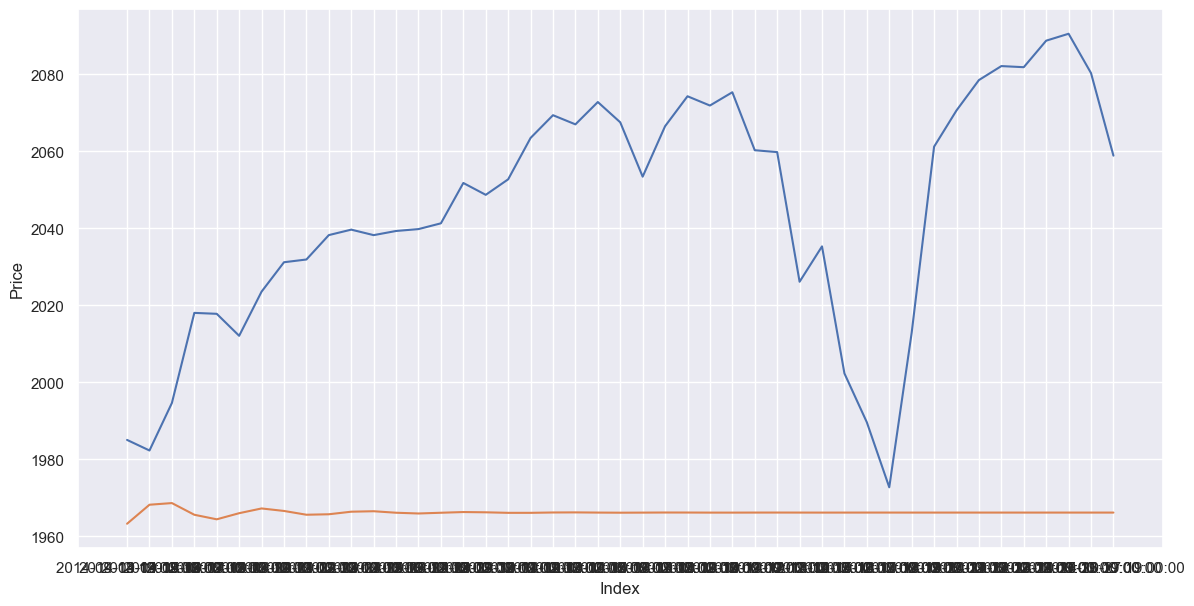

In [40]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [41]:
pred

2014-09-13 19:00:00    1963.269004
2014-09-14 19:00:00    1968.210795
2014-09-15 19:00:00    1968.639586
2014-09-16 19:00:00    1965.603650
2014-09-17 19:00:00    1964.420960
2014-09-18 19:00:00    1966.011074
2014-09-19 19:00:00    1967.243994
2014-09-20 19:00:00    1966.594656
2014-09-21 19:00:00    1965.610988
2014-09-22 19:00:00    1965.732511
2014-09-23 19:00:00    1966.398699
2014-09-24 19:00:00    1966.520165
2014-09-25 19:00:00    1966.129943
2014-09-26 19:00:00    1965.935442
2014-09-27 19:00:00    1966.127118
2014-09-28 19:00:00    1966.308992
2014-09-29 19:00:00    1966.240667
2014-09-30 19:00:00    1966.103776
2014-10-01 19:00:00    1966.106576
2014-10-02 19:00:00    1966.195064
2014-10-03 19:00:00    1966.219741
2014-10-04 19:00:00    1966.170464
2014-10-05 19:00:00    1966.139923
2014-10-06 19:00:00    1966.162340
2014-10-07 19:00:00    1966.188600
2014-10-08 19:00:00    1966.182102
2014-10-09 19:00:00    1966.163344
2014-10-10 19:00:00    1966.161894
2014-10-11 19:00:00 

In [42]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

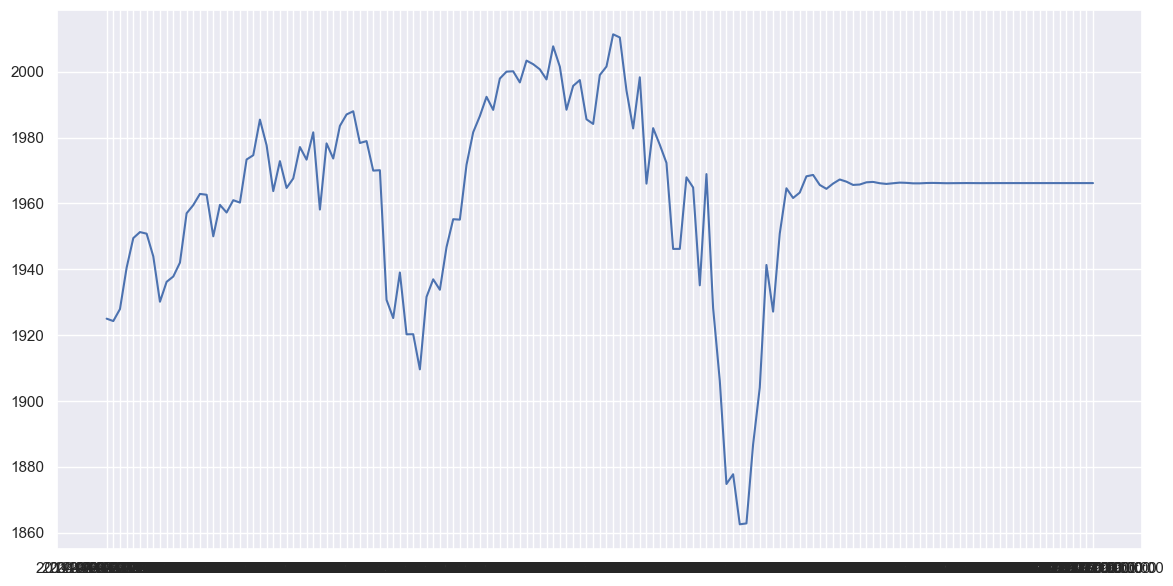

In [43]:
plt.plot(temper)

In [44]:
temper

,Close
new_date,
2014-06-01 19:00:00,1924.970000
2014-06-02 19:00:00,1924.240000
2014-06-03 19:00:00,1927.880000
2014-06-04 19:00:00,1940.460000
2014-06-05 19:00:00,1949.440000
...,...
2014-10-23 19:00:00,1966.154110
2014-10-24 19:00:00,1966.152910
2014-10-25 19:00:00,1966.153280


In [45]:
test

[1963.269003958799,
 1968.2121332623126,
 1968.6398475885003,
 1965.598312684434,
 1964.4108040465433,
 1966.009144567896,
 1967.252693266851,
 1966.5973874684967,
 1965.5987498410407,
 1965.720542706211,
 1966.3877801276778,
 1966.5179322480355,
 1966.1126645773543,
 1965.904872673963,
 1966.1045547782755,
 1966.301066218465,
 1966.2317170072179,
 1966.0819894831625,
 1966.080448608568,
 1966.1779503178575,
 1966.2099451799293,
 1966.1563906521337,
 1966.1178559755185,
 1966.1404393743614,
 1966.1734094585393,
 1966.1696788397358,
 1966.1465924939937,
 1966.140946067099,
 1966.154203569141,
 1966.1628767712482,
 1966.1573123548721,
 1966.1493600231415,
 1966.149878515858,
 1966.1554633037754,
 1966.157461369162,
 1966.1545570624266,
 1966.1518013281782,
 1966.152524974855,
 1966.1548144850133,
 1966.1554630821834,
 1966.154110258995,
 1966.152910099334,
 1966.1532799604104,
 1966.1544852218317,
 1966.1548647064467]

In [46]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-09-13 19:00:00,1985.05,1964.14,1985.05,1964.14,1.19%,10/28/2014,1.410610e+09
2014-09-14 19:00:00,1982.30,1983.29,1991.40,1969.04,-0.14%,10/29/2014,1.410696e+09
2014-09-15 19:00:00,1994.65,1979.49,1999.40,1974.75,0.62%,10/30/2014,1.410782e+09
2014-09-16 19:00:00,2018.05,2001.20,2018.19,2001.20,1.17%,10/31/2014,1.410869e+09
2014-09-17 19:00:00,2017.81,2018.21,2024.46,2013.68,-0.01%,11/03/2014,1.410955e+09
2014-09-18 19:00:00,2012.10,2015.81,2015.98,2001.01,-0.28%,11/04/2014,1.411042e+09
2014-09-19 19:00:00,2023.57,2015.29,2023.77,2014.42,0.57%,11/05/2014,1.411128e+09
2014-09-20 19:00:00,2031.21,2023.33,2031.61,2015.86,0.38%,11/06/2014,1.411214e+09
2014-09-21 19:00:00,2031.92,2032.36,2034.26,2025.07,0.03%,11/07/2014,1.411301e+09


Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=974.421, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1215.844, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=969.887, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1114.155, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2163.087, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=967.894, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=969.886, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=971.886, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=969.241, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=969.441, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1115.463, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=970.413, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.888 seconds


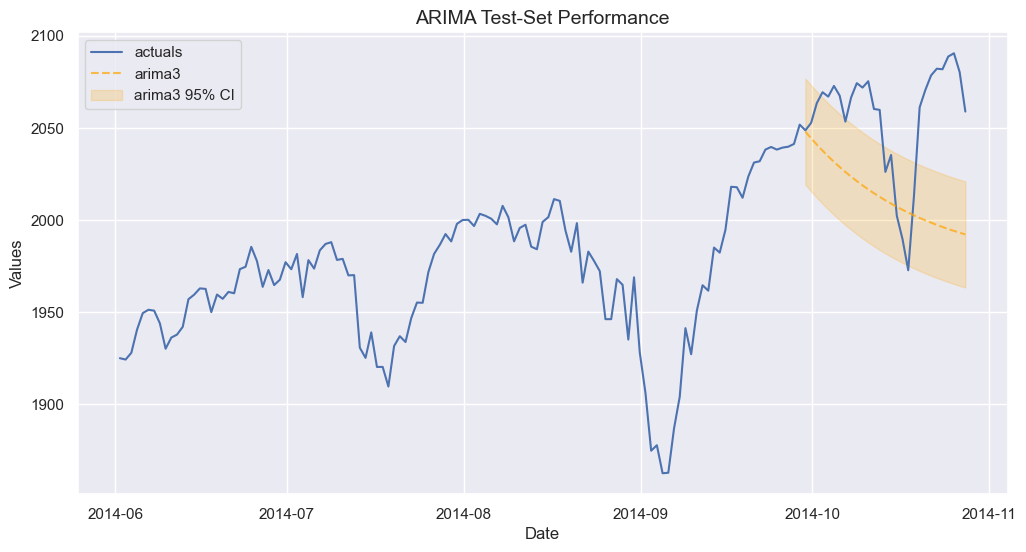

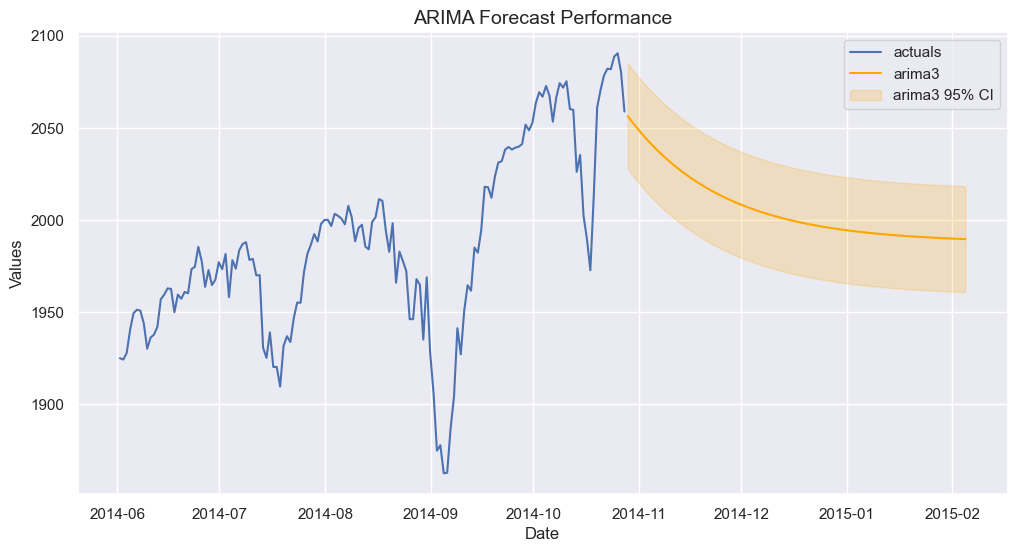

In [47]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [48]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  149
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -606.017
Date:                Sun, 22 Oct 2023   AIC                           1218.035
Time:                        11:20:09   BIC                           1227.047
Sample:                             0   HQIC                          1221.696
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1987.7494     27.454     72.402      0.000    1933.940    2041.559
ar.L1          0.9644      0.024     39.677      0.000       0.917       1.012
sigma2       196.1201     17.262     11.361      0.000     162.287     229.953
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                16.05
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.23
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

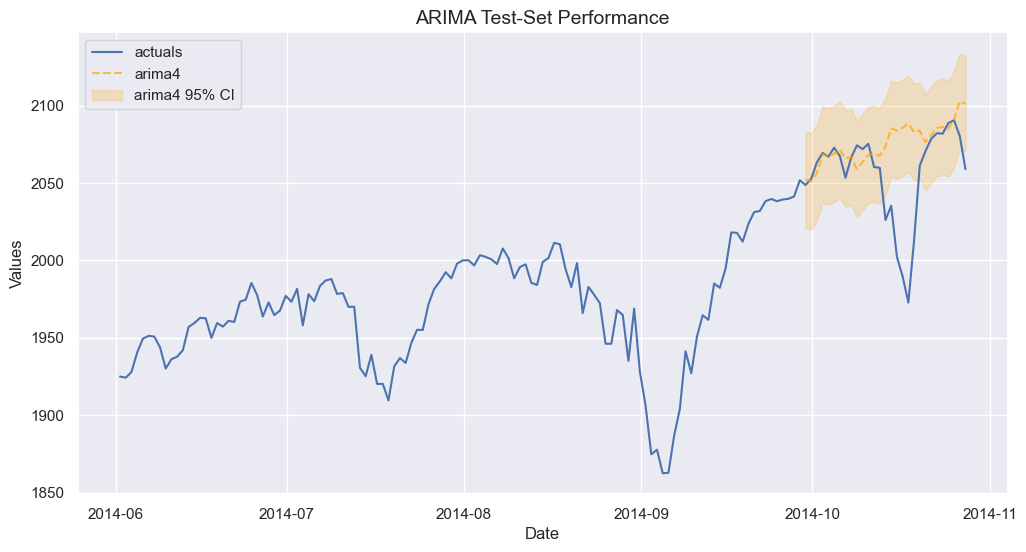

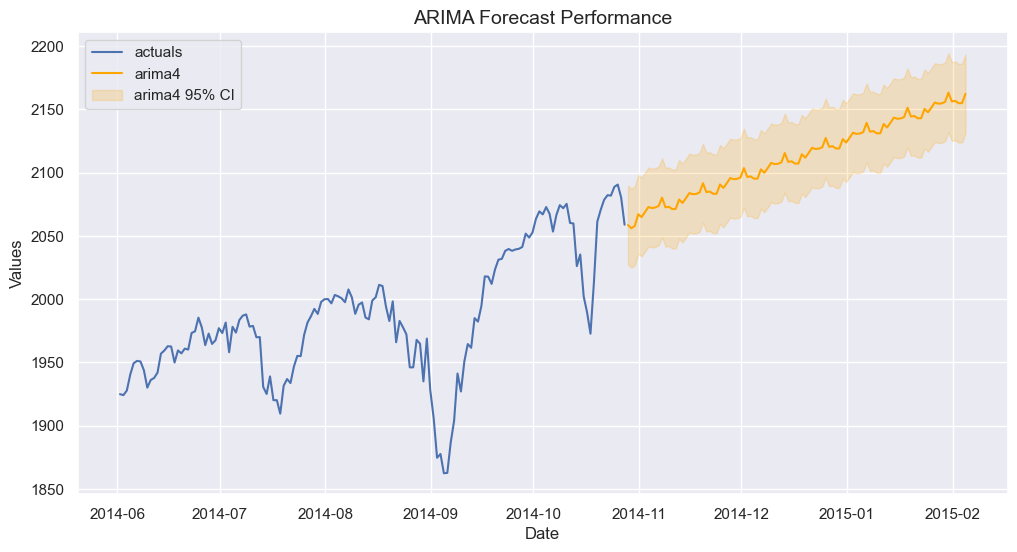

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  149
Model:             ARIMA(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -569.191
Date:                          Sun, 22 Oct 2023   AIC                           1146.382
Time:                                  11:20:13   BIC                           1158.033
Sample:                                       0   HQIC                          1151.117
                                          - 149                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0154      0.069      0.224      0.822      -0.119       0.150
ar.S.L12       0.0445      0.137      0.324      0.746      -0.224       0.313
ma.S.L12      -0.8990      0.202     -4.458      0.000      -1.294      -0.504
sigma2       221.4318     29.545      7.495      0.000     163.526     279.338
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.19
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               1.61   Skew:                             0.15
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [50]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [51]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima4,"{'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 12)}",0.015405,0.011070
1,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.015462,0.015281
2,arima3,"{'order': (1, 0, 0), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.005313,0.022237
3,arima1,{},0.019828,0.042190
